Programar un gradiente


Utilizar un array, 5 o 6 vectores con np. Es decir se puede utilizar un vector de uno

Tomar una función definida f(x)
Def f(x)
Return a@x-b

Utilizar un gradiente (x=x-alfa((f(x-h)- f(x))/h)
H puede ser 10 elevado a la -3



Crear metodo de degradiente sencillo


Converged in 18 iterations.
Solution vector x: [4.99999987 4.99999985 4.99999983]
R-squared: 0.9999999999999999
Matrix Norms:
Norm-1: 6.0
Norm-2: 5.246979603717468
Infinity Norm: 6.0


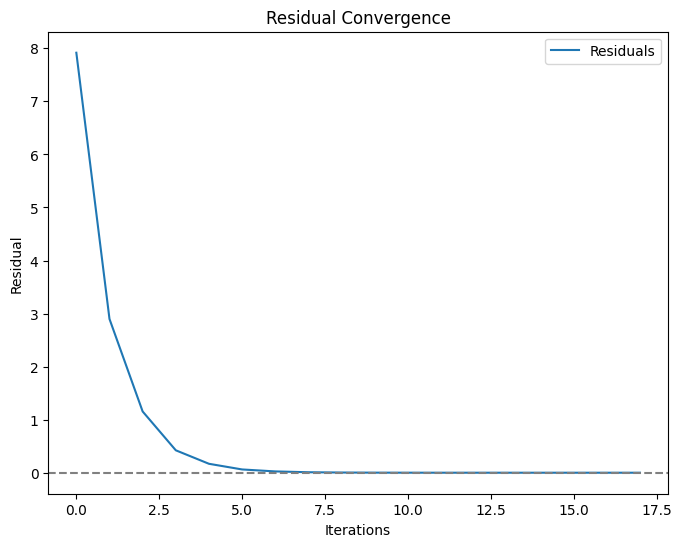

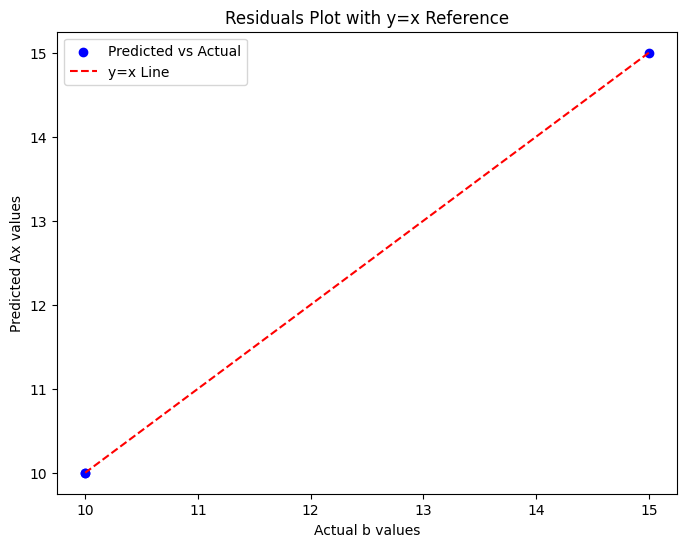

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define matrix A and vector b
A = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 3]])  # Example 3x3 matrix
b = np.array([15, 10, 10])  # Example vector

# Parameters
tolerance = 1e-6
max_iterations = 1000

# Jacobi Iterative Method Function
def jacobi(A, b, tolerance, max_iterations):
    n = len(b)
    x = np.zeros_like(b, dtype=np.float64)  # Initial guess of x (zeros)
    x_prev = x.copy()
    residuals = []

    for k in range(max_iterations):
        x_new = np.zeros_like(x)
        
        for i in range(n):
            s = sum(A[i][j] * x_prev[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - s) / A[i][i]
        
        # Calculate residual and check tolerance
        residual = np.linalg.norm(b - A @ x_new)
        residuals.append(residual)
        
        if np.linalg.norm(x_new - x_prev) < tolerance:
            print(f'Converged in {k + 1} iterations.')
            break
        
        x_prev = x_new

    return x_new, residuals

# Solve the system
solution, residuals = jacobi(A, b, tolerance, max_iterations)

# Calculate R-squared
r_squared = 1 - np.var(b - A @ solution) / np.var(b)
print("Solution vector x:", solution)
print("R-squared:", r_squared)

# Calculate Matrix Norms
norm_1 = np.linalg.norm(A, 1)
norm_2 = np.linalg.norm(A, 2)
norm_inf = np.linalg.norm(A, np.inf)
print("Matrix Norms:")
print("Norm-1:", norm_1)
print("Norm-2:", norm_2)
print("Infinity Norm:", norm_inf)

# Plot Residuals
plt.figure(figsize=(8, 6))
plt.plot(residuals, label="Residuals")
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Iterations')
plt.ylabel('Residual')
plt.title('Residual Convergence')
plt.legend()
plt.show()

# Residual Plot for y=x Line
plt.figure(figsize=(8, 6))
plt.scatter(b, A @ solution, color="blue", label="Predicted vs Actual")
plt.plot(b, b, color="red", linestyle="--", label="y=x Line")
plt.xlabel("Actual b values")
plt.ylabel("Predicted Ax values")
plt.title("Residuals Plot with y=x Reference")
plt.legend()
plt.show()